<a href="https://colab.research.google.com/github/Tefyman2050/DataAnalitics/blob/main/ProcesosEstocasticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejemplo 3: Simulación de un Proceso de Poisson

El Proceso de Poisson modela el número de eventos que ocurren en un intervalo de tiempo fijo, asumiendo que los eventos ocurren con una tasa promedio conocida (\(\lambda\)) y de forma independiente. Es un proceso en tiempo continuo con espacio de estados discreto (el número de eventos es un entero).

--- Ejecutando 5 simulaciones del Proceso de Poisson ---
Promedio esperado de eventos por simulación: 20

Simulación 1: Número total de eventos observados en 10 unidades de tiempo: 14
Simulación 2: Número total de eventos observados en 10 unidades de tiempo: 11
Simulación 3: Número total de eventos observados en 10 unidades de tiempo: 20
Simulación 4: Número total de eventos observados en 10 unidades de tiempo: 21


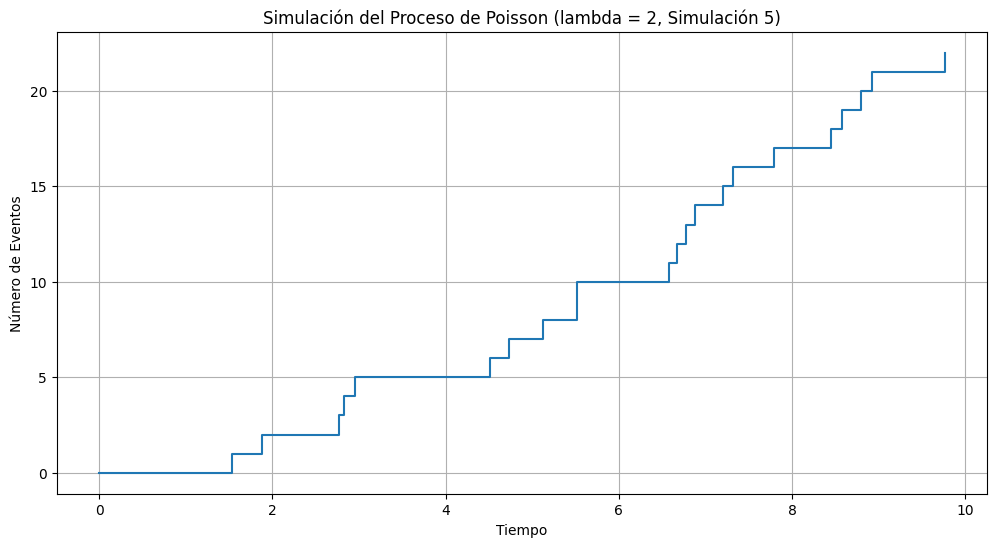

Simulación 5: Número total de eventos observados en 10 unidades de tiempo: 22

--- Análisis de las 5 simulaciones ---
Promedio de eventos observados: 17.60
Desviación estándar de eventos observados: 4.32


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del Proceso de Poisson
tiempo_total = 10     # Tiempo total de observación
tasa_lambda = 2       # Tasa promedio de eventos por unidad de tiempo

# Número de simulaciones a ejecutar
num_simulaciones = 5

observed_events_counts = [] # Lista para almacenar el número de eventos observados en cada simulación

print(f"--- Ejecutando {num_simulaciones} simulaciones del Proceso de Poisson ---")
print(f"Promedio esperado de eventos por simulación: {tasa_lambda * tiempo_total}\n")

for i in range(num_simulaciones):
    # Generar los tiempos entre eventos (distribución exponencial)
    intervalos_entre_eventos = np.random.exponential(1/tasa_lambda, size=1000) # Generamos muchos para asegurar cubrir tiempo_total

    # Calcular los tiempos acumulados en los que ocurren los eventos
    tiempos_eventos = np.cumsum(intervalos_entre_eventos)

    # Filtrar los eventos que ocurren dentro del tiempo total de observación
    tiempos_eventos = tiempos_eventos[tiempos_eventos <= tiempo_total]

    # Guardar el número de eventos observados
    observed_event_count = len(tiempos_eventos)
    observed_events_counts.append(observed_event_count)

    # Construir el proceso de Poisson para la visualización (solo la última simulación)
    if i == num_simulaciones - 1:
        t = np.insert(tiempos_eventos, 0, 0)
        N_t = np.arange(observed_event_count + 1)

        # Visualizar el Proceso de Poisson (solo la última simulación)
        plt.figure(figsize=(12, 6))
        plt.step(t, N_t, where='post')
        plt.title(f'Simulación del Proceso de Poisson (lambda = {tasa_lambda}, Simulación {i+1})')
        plt.xlabel('Tiempo')
        plt.ylabel('Número de Eventos')
        plt.grid(True)
        plt.show()

    # Mostrar el número total de eventos para cada simulación
    print(f'Simulación {i+1}: Número total de eventos observados en {tiempo_total} unidades de tiempo: {observed_event_count}')

# Calcular y mostrar el promedio y la desviación estándar de los eventos observados
mean_observed = np.mean(observed_events_counts)
std_dev_observed = np.std(observed_events_counts)

print(f"\n--- Análisis de las {num_simulaciones} simulaciones ---")
print(f"Promedio de eventos observados: {mean_observed:.2f}")
print(f"Desviación estándar de eventos observados: {std_dev_observed:.2f}")


En este gráfico, puedes ver cómo el número de eventos acumulados ($N(t)$) aumenta con el tiempo de forma discreta, saltando en cada punto donde ocurre un evento. La pendiente promedio de la 'escalera' refleja la tasa (lambda) del proceso. Este es un excelente ejemplo de un proceso estocástico donde el estado cambia en instantes aleatorios y el espacio de estados es discreto.

# Clase Maestra: Introducción a los Procesos Estocásticos

Los procesos estocásticos son modelos matemáticos que describen la evolución de un sistema que cambia aleatoriamente con el tiempo. A diferencia de los procesos determinísticos, donde el estado futuro de un sistema se puede predecir con certeza a partir de su estado actual, en los procesos estocásticos hay un elemento de aleatoriedad inherente.

Son herramientas fundamentales en muchas disciplinas, como las finanzas (modelado de precios de acciones), la física (movimiento browniano), la biología (crecimiento de poblaciones, difusión de enfermedades), la ingeniería y la inteligencia artificial.

## Conceptos Clave

Antes de sumergirnos, es importante entender algunos conceptos básicos:

*   **Variable Aleatoria:** Una función que asigna un valor numérico a cada resultado de un experimento aleatorio.
*   **Distribución de Probabilidad:** Describe la probabilidad de que una variable aleatoria tome cada uno de sus posibles valores.
*   **Proceso Estocástico:** Una colección de variables aleatorias indexadas por el tiempo. $ \{X_t\}_{t \in T} $, donde $X_t$ es una variable aleatoria para cada $t$ en un conjunto de índices $T$ (a menudo el tiempo).
*   **Espacio de Estados:** El conjunto de todos los valores posibles que puede tomar la variable aleatoria $X_t$.
*   **Tiempo Discreto vs. Tiempo Continuo:** El índice $T$ puede ser discreto (ej. $t = 0, 1, 2, \dots$) o continuo (ej. $t \in [0, \infty)$).
*   **Independencia:** Los valores futuros de un proceso estocástico no dependen de sus valores pasados.
*   **Estacionariedad:** Las propiedades estadísticas del proceso no cambian con el tiempo.
*   **Propiedad de Markov:** El futuro del proceso solo depende de su estado presente, no de cómo llegó a ese estado (el pasado no importa, dado el presente).

## Tipos Comunes de Procesos Estocásticos

1.  **Cadenas de Markov:** Procesos en tiempo discreto con un espacio de estados discreto que satisfacen la propiedad de Markov.
2.  **Paseos Aleatorios:** Un tipo de cadena de Markov donde el estado cambia en cada paso de manera aleatoria.
3.  **Procesos de Poisson:** Modelan el número de eventos que ocurren en un intervalo de tiempo fijo, donde los eventos ocurren con una tasa promedio conocida e independiente de eventos pasados.
4.  **Proceso de Wiener (Movimiento Browniano):** Un proceso en tiempo continuo y espacio de estados continuo que sirve como base para muchos modelos en finanzas y física.

### Ejemplo 1: Simulación de un Paseo Aleatorio Simple (Cadena de Markov Discreta)

Un paseo aleatorio es uno de los procesos estocásticos más simples y estudiados. En cada paso, un "caminante" se mueve un paso hacia la derecha o hacia la izquierda con cierta probabilidad.

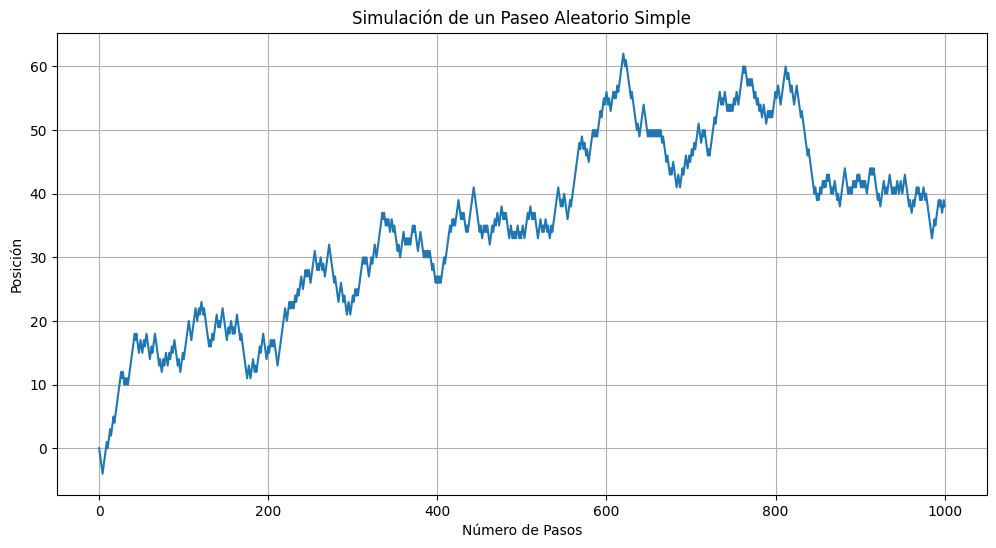

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del paseo aleatorio
num_pasos = 1000
posicion_inicial = 0
prob_derecha = 0.5 # Probabilidad de moverse a la derecha

# Generar los pasos: 1 para derecha, -1 para izquierda
pasos = np.random.choice([-1, 1], size=num_pasos, p=[1 - prob_derecha, prob_derecha])

# Calcular las posiciones acumuladas
posiciones = np.cumsum(pasos) + posicion_inicial

# Agregar la posición inicial al inicio de las posiciones
posiciones = np.insert(posiciones, 0, posicion_inicial)

# Visualizar el paseo aleatorio
plt.figure(figsize=(12, 6))
plt.plot(posiciones)
plt.title('Simulación de un Paseo Aleatorio Simple')
plt.xlabel('Número de Pasos')
plt.ylabel('Posición')
plt.grid(True)
plt.show()

### Ejemplo 2: Simulación del Movimiento Browniano (Proceso de Wiener)

El Movimiento Browniano es un proceso estocástico en tiempo continuo que modela el movimiento aleatorio de partículas suspendidas en un fluido. Es fundamental en la modelización de procesos financieros (como los precios de las acciones) a través de la ecuación diferencial estocástica de Black-Scholes. Puede verse como el límite de un paseo aleatorio cuando los pasos se hacen infinitamente pequeños y el tiempo continuo.

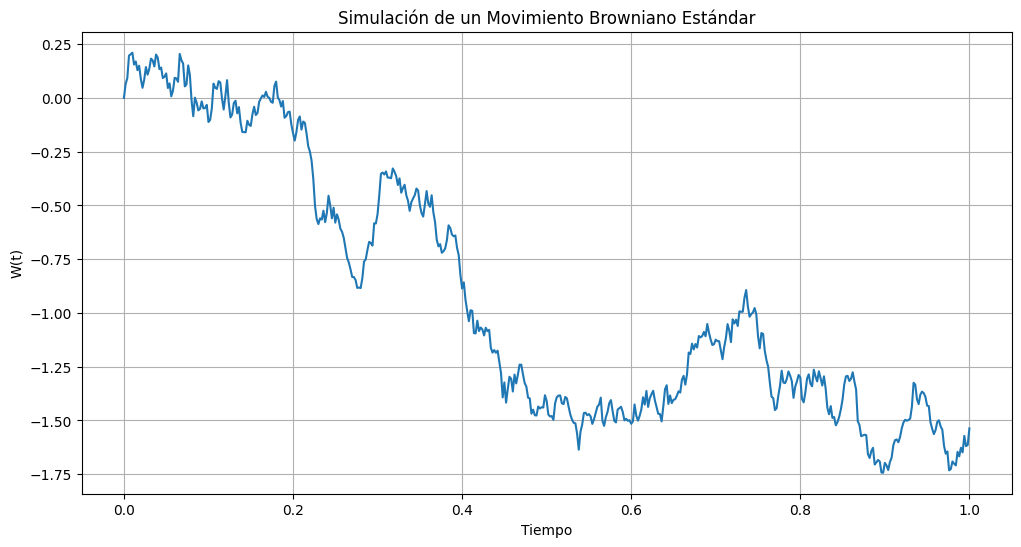

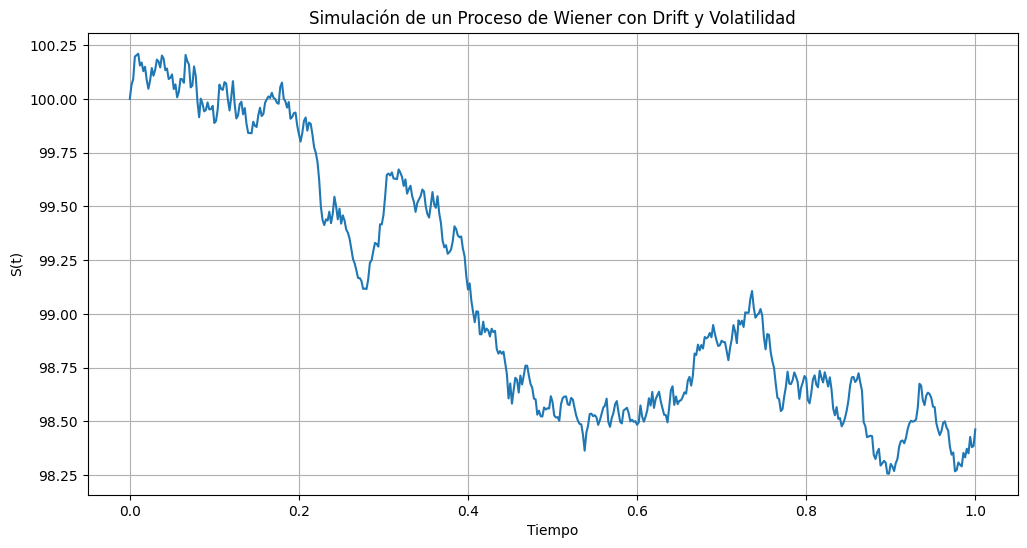

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del Movimiento Browniano
T = 1.0       # Tiempo total
N = 500       # Número de pasos de tiempo
dt = T / N    # Tamaño del paso de tiempo
mu = 0.0      # Drift (tendencia)
sigma = 1.0   # Volatilidad (desviación estándar)

# Generar incrementos aleatorios (normalmente distribuidos)
dW = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=N)

# Calcular los valores del Movimiento Browniano
W = np.cumsum(dW)

# Añadir el punto inicial (W_0 = 0)
W = np.insert(W, 0, 0)

# Crear el eje de tiempo
t = np.linspace(0, T, N + 1)

# Visualizar el Movimiento Browniano
plt.figure(figsize=(12, 6))
plt.plot(t, W)
plt.title('Simulación de un Movimiento Browniano Estándar')
plt.xlabel('Tiempo')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()

# Para un proceso de Wiener con drift y volatilidad:
# S(t) = S_0 + mu*t + sigma*W(t)
S0 = 100 # Valor inicial
S = S0 + mu * t + sigma * W

plt.figure(figsize=(12, 6))
plt.plot(t, S)
plt.title('Simulación de un Proceso de Wiener con Drift y Volatilidad')
plt.xlabel('Tiempo')
plt.ylabel('S(t)')
plt.grid(True)
plt.show()

## Aplicaciones de los Procesos Estocásticos

*   **Finanzas:** Modelado de precios de acciones, opciones, bonos; gestión de riesgos.
*   **Física:** Movimiento browniano, mecánica estadística, dinámica molecular.
*   **Ingeniería:** Procesamiento de señales, teoría de colas, fiabilidad de sistemas.
*   **Biología:** Dinámica de poblaciones, difusión de enfermedades, cinética química.
*   **Ciencias de la Computación:** Algoritmos de Monte Carlo, aprendizaje por refuerzo, análisis de redes.

## Próximos Pasos y Recursos Adicionales

Esta ha sido una introducción muy básica. Los procesos estocásticos son un campo vasto y complejo. Para profundizar, te recomiendo explorar:

*   **Procesos de Poisson:** Para modelar la ocurrencia de eventos aleatorios en el tiempo.
*   **Cadenas de Markov en tiempo continuo:** Más allá de las discretas.
*   **Ecuaciones Diferenciales Estocásticas (SDEs):** Para modelar sistemas donde el ruido es una parte integral de la dinámica.
*   **Series Temporales:** Modelos como ARIMA, GARCH, que utilizan conceptos estocásticos.

**Libros Recomendados:**

*   "Stochastic Processes" por Sheldon M. Ross
*   "Introduction to Stochastic Processes" por Paul G. Hoel, Sidney C. Port, Charles J. Stone
*   "Stochastic Calculus for Finance I: The Binomial Asset Pricing Model" y "Stochastic Calculus for Finance II: Continuous-Time Models" por Steven Shreve (orientado a finanzas).

¡Espero que esta clase te haya dado una buena base para comenzar tu viaje en el mundo de los procesos estocásticos!